In [9]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 


# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('measurements.csv')
data = dataset.values
dataset.describe()
x = dataset.drop(columns='consume')
y = data[:, 1]


print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

del(dataset['refill liters'])
del(dataset['refill gas'])
del(dataset['specials'])

dataset.loc[dataset['gas_type'] == 'E10', "gas_type"] = 1
dataset.loc[dataset['gas_type'] == 'SP98', "gas_type"] = 0

dataset['temp_inside']=dataset['temp_inside'].fillna(dataset["temp_inside"].mean())

dataset['distance']=1/(dataset['distance'])
#print(dataset['distance'])
dataset['speed']=1/(dataset['speed'])
dataset['time'] = dataset['distance']/dataset['speed']
print(min(dataset['time']))
x = dataset.drop(columns='consume')
"""
x = x.drop(columns='temp_inside')
x = x.drop(columns='temp_outside')
x = x.drop(columns='gas_type')
x = x.drop(columns='AC')
x = x.drop(columns='distance')
x = x.drop(columns='speed')
x = x.drop(columns='sun')
x = x.drop(columns='time')
"""
x=x.values

Dimensionalitat de la BBDD: (388, 12)
Dimensionalitat de les entrades X (388, 11)
Dimensionalitat de l'atribut Y (388,)
Per comptar el nombre de valors no existents:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64
0.37914691943127965


A continuaciò mirem la correlació dels diferents atributs


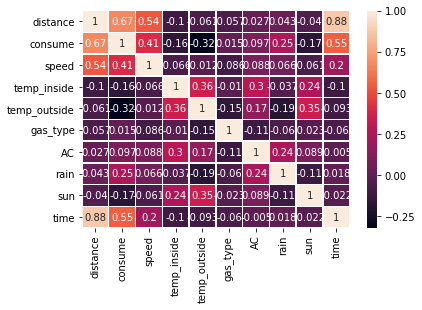

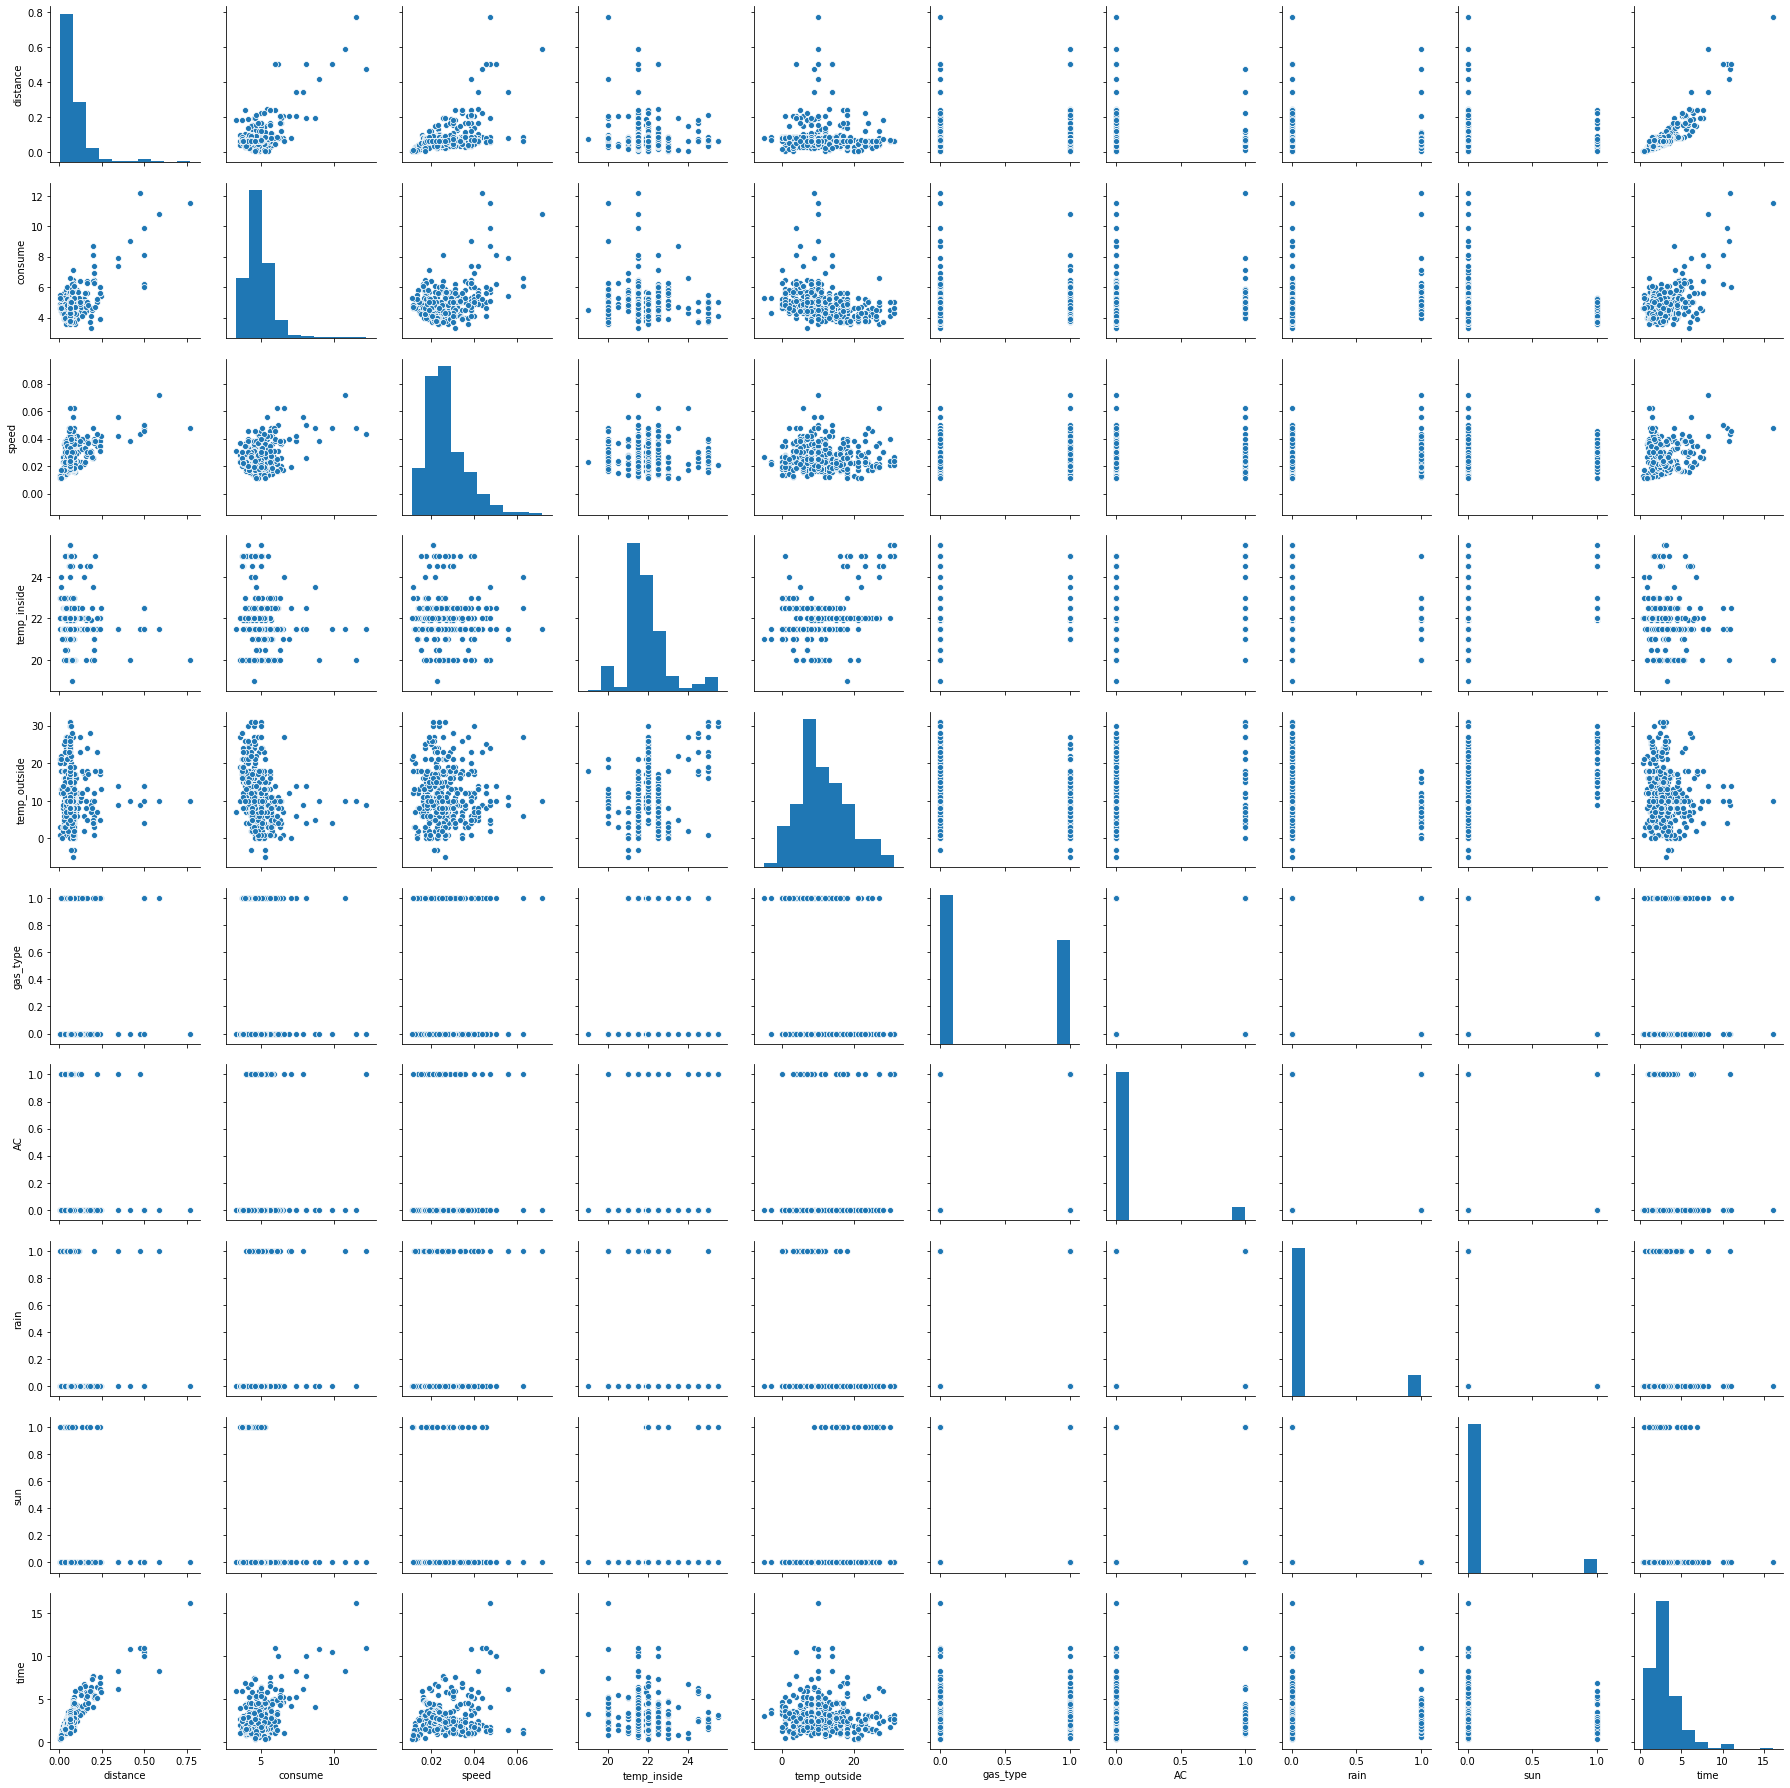

In [2]:
#x
x_data=x
#x=x.values
#print(dataset)
print("A continuaciò mirem la correlació dels diferents atributs")
import seaborn as sns
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
relacio = sns.pairplot(dataset)
###################################################################################################
# regression

In [37]:
from sklearn.metrics import r2_score

def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def split_data(x, y, train_ratio=0.8):
    np.random.seed(5)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

# Dividim dades d'entrenament
x_train, y_train, x_val, y_val = split_data(x, y)


In [6]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression(fit_intercept=True)

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [7]:
for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)    
    error = mse(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Error en atribut 0: 0.541897
R2 score en atribut 0: 0.441783
Error en atribut 1: 0.845317
R2 score en atribut 1: 0.129225
Error en atribut 2: 0.958947
R2 score en atribut 2: 0.012173
Error en atribut 3: 0.820503
R2 score en atribut 3: 0.154786
Error en atribut 4: 0.970081
R2 score en atribut 4: 0.000704
Error en atribut 5: 1.007906
R2 score en atribut 5: -0.038261
Error en atribut 6: 0.865980
R2 score en atribut 6: 0.107940
Error en atribut 7: 0.962880
R2 score en atribut 7: 0.008121
Error en atribut 8: 0.751982
R2 score en atribut 8: 0.225371


In [38]:
from sklearn.feature_selection import RFE
x_train, y_train, x_val, y_val = split_data(x, y)
regr = regression(x_train, y_train)    
error = mse(y_train, regr.predict(x_train)) # calculem error
r2 = r2_score(y_train, regr.predict(x_train))
print("Error en train : %f" %(error))
print("R2 score en train: %f" %(r2))
#x_train
error = mse(y_val, regr.predict(x_val)) # calculem error
r2 = r2_score(y_val, regr.predict(x_val))
print("Error en test : %f" %(error))
print("R2 score en test : %f" %(r2))
print ('\nCoefs (per dim) ', regr.coef_, ' and intercept: ', regr.intercept_)

Error en train : 0.410301
R2 score en train: 0.500918
Error en test : 0.595710
R2 score en test : 0.691456

Coefs (per dim)  [11.48025819 -6.04737609 -0.02563844 -0.03535477  0.08829827  0.4873496
  0.45085915 -0.10266033 -0.13711937]  and intercept:  5.36638411952133


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def regression_2(x, y):
    # Creem un objecte de regressió de sklearn
    regr=make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True))

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

In [11]:
regr_poly = regression_2(x_train, y_train)    
error = mse(y_train, regr_poly.predict(x_train)) # calculem error
r2 = r2_score(y_train, regr_poly.predict(x_train))
print("Error en atribut : %f" %(error))
print("R2 score en atribut : %f" %(r2))
error = mse(y_val, regr_poly.predict(x_val)) # calculem error
r2 = r2_score(y_val, regr_poly.predict(x_val))
print("Error en atribut : %f" %(error))
print("R2 score en atribut : %f" %(r2))


NameError: name 'regression_2' is not defined

In [112]:
from sklearn import linear_model
regr_lasso=linear_model.Lasso(alpha=.3)
regr_lasso.fit(x_train, y_train) 
print ('Coeffs (per dim): ', regr_lasso.coef_, 'and intercept:', regr_lasso.intercept_)
#print (boston.feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regr_lasso.score(x_train, y_train)) 
print ('Testing Score:', regr_lasso.score(x_val, y_val)) 
# Is the score almost the same?
print ('\nTraining MSE: ', np.mean((regr_lasso.predict(x_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_lasso.predict(x_val) - y_val)**2))

Coeffs (per dim):  [-0.         -0.01435591 -0.         -0.04557313 -0.          0.
  0.         -0.        ] and intercept: 6.036231591510153

Training Score: 0.1690613219019742
Testing Score: 0.0837895120975456

Training MSE:  0.8763077569900903
Testing MSE:  1.0117710610785524


In [46]:
y = dataset.filter(['consume'])
y=y.values

In [50]:
import statsmodels.api as sm
x_train, y_train, x_val, y_val = split_data(x, y)
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
print(est.fit().summary())
model=est.fit()
X3 = sm.add_constant(x_val)
ypred=model.predict(X3)
error = mse(y_val, ypred) # calculem error
r2 = r2_score(y_val,ypred)
print("Error en atribut : %f" %(error))
print("R2 score en atribut : %f" %(r2))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     33.46
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.81e-40
Time:                        16:25:04   Log-Likelihood:                -301.79
No. Observations:                 310   AIC:                             623.6
Df Residuals:                     300   BIC:                             660.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3664      0.938      5.719      0.0

In [43]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x_train)
model = sm.OLS(y_train, xp).fit()
print(est.fit().summary())
X3 = polynomial_features.fit_transform(x_val)
ypred = model.predict(X3)
error = mse(y_val, ypred) # calculem error
r2 = r2_score(y_val,ypred)
print("Error en atribut : %f" %(error))
print("R2 score en atribut : %f" %(r2))

TypeError: No loop matching the specified signature and casting
was found for ufunc add